In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
 
import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import edward.models as edm
from tensorflow.contrib.distributions.python.ops import bijectors as bijector
plt.style.use('ggplot')
 
ed.set_seed(42)

In [4]:
N=1000
 
y_dat=np.random.normal(loc=2,scale=1,size=N)
y_dat=y_dat.astype(np.float32)
 
mu=edm.Normal(loc=tf.zeros([1]),scale=tf.ones([1])*1.5)
sigma=edm.InverseGamma(concentration=tf.ones([1]),rate=tf.ones([1])) # shape, rate. not shape scale
y=edm.Normal(loc=tf.ones([N])*mu,scale=sigma)
 
qmu=edm.Normal(loc=tf.Variable(tf.random_normal([1])),
              scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
#qsigma=edm.InverseGamma(concentration=tf.nn.softplus(tf.Variable(tf.random_normal([1]))),
#                  rate=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))# 
qsigma = ed.models.TransformedDistribution(
    distribution=ed.models.NormalWithSoftplusScale(tf.Variable(tf.zeros([1])),
                                                   tf.Variable(tf.zeros([1]))),
    bijector=bijector.Exp())

inference = ed.KLqp({mu:qmu,sigma:qsigma}, data={y: y_dat})

#inference.run(n_iter=5000)
inference.initialize(n_iter=5000)

{'loss': 1445.8088, 't': 1}
{'loss': 1409.1182, 't': 1001}
{'loss': 1410.2383, 't': 2001}
{'loss': 1409.8411, 't': 3001}
{'loss': 1410.8569, 't': 4001}


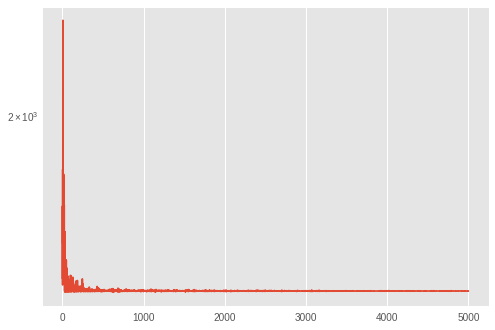

In [5]:
sess = ed.get_session()
init = tf.global_variables_initializer()
init.run()
learning_curve = []
for _ in range(inference.n_iter):
    info_dict = inference.update()
    if _%1000 == 0:
        print(info_dict)
    learning_curve.append(info_dict['loss'])
plt.semilogy(learning_curve)